In [1]:
import time
import bitso
import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [3]:
scope = ['https://spreadsheets.google.com/feeds']
creds = ServiceAccountCredentials.from_json_keyfile_name('client_secret.json', scope)
client = gspread.authorize(creds)

In [4]:
Historical = client.open("Historical Bitso")

In [5]:
BCH = Historical.get_worksheet(3)

In [14]:
col_names=True
row_names=True

raw_data = BCH.get_all_values()

start_row_int, start_col_int = BCH.get_int_addr('A1')

rows, cols  = np.shape(raw_data)

raw_data = [row[start_col_int-1:] for row in raw_data[start_row_int-1:]]

if row_names and col_names:
    row_names = [row[0] for row in raw_data[1:]]
    col_names = raw_data[0][1:]
    raw_data = [row[1:] for row in raw_data[1:]]
elif row_names:
    row_names = [row[0] for row in raw_data]
    col_names = np.arange(len(raw_data[0]) - 1)
    raw_data = [row[1:] for row in raw_data]
elif col_names:
    row_names = np.arange(len(raw_data) - 1)
    col_names = raw_data[0]
    raw_data = raw_data[1:]
else:
    row_names = np.arange(len(raw_data))
    col_names = np.arange(len(raw_data[0]))

df = pd.DataFrame([pd.Series(row) for row in raw_data], index=row_names)
df.columns = col_names
Bitso = df

In [344]:
Bitso.head()

,ASK,BID,HIGH,LAST,LOW,VWAP,VOLUME
TIME,,,,,,,
2017-12-20 19:07:48,354651.30,354000.00,370000.0,352500.00,340000.0,355378.537569,624.450835
2017-12-20 19:22:49,354991.00,350500.03,370000.0,355242.76,340000.0,355227.793805,630.361676
2017-12-20 19:37:52,355379.93,355080.61,370000.0,355379.93,340000.0,355111.367255,633.392784
2017-12-20 19:52:54,358880.61,356009.50,370000.0,358880.61,340000.0,354968.254301,633.153182
2017-12-20 20:07:55,358499.97,356769.39,370000.0,356750.00,340000.0,354834.886114,628.870984


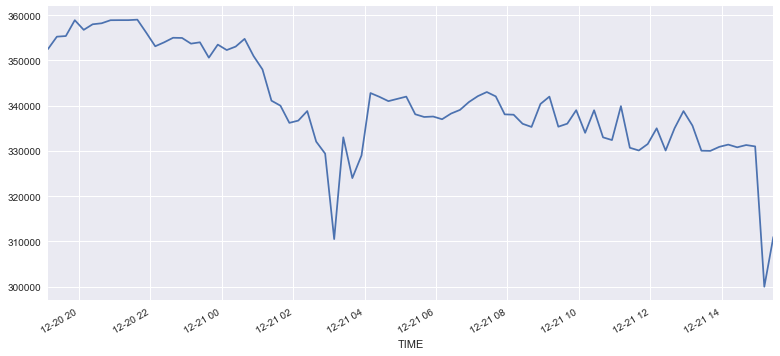

In [345]:
Bitso['LAST'].plot(figsize=(13,6))

In [346]:
#Se ponen los promedio pm1 y pm2 en minutos (puede tener decimales)
pm1 = 30
pm2 = 135
#Los valores se obtienen cada 15 min asi que se ajusta
pm1 = int(pm1 / 15)
pm2 = int(pm2 / 15)

In [347]:
Bitso['PM1'] = Bitso['LAST'].rolling(pm1).mean()
Bitso['PM2'] = Bitso['LAST'].rolling(pm2).mean()

In [348]:
Bitso.tail()

,ASK,BID,HIGH,LAST,LOW,VWAP,VOLUME,PM1,PM2
TIME,,,,,,,,,
2017-12-21 14:26:15,330799.95,330002.05,345126.3,330800.00,330000.01,332816.390489,641.725743,331098.500,332515.220000
2017-12-21 14:41:17,331300.00,331100.00,345126.3,331300.00,330000.01,332545.102256,642.236384,331050.000,332649.412222
2017-12-21 14:56:25,331000.00,329500.50,345126.3,331000.00,329500.50,332261.697596,652.805934,331150.000,332204.967778
2017-12-21 15:11:49,307000.00,300000.00,345126.3,300000.00,300000.00,331111.356873,674.848133,315500.000,327893.968889
2017-12-21 15:27:00,310998.99,304000.00,345126.3,310998.99,289011.17,328743.212236,687.486926,305499.495,325161.774444


In [349]:
Bitso.dropna(inplace = True)

In [350]:
Bitso.head()

,ASK,BID,HIGH,LAST,LOW,VWAP,VOLUME,PM1,PM2
TIME,,,,,,,,,
2017-12-20 21:08:01,358893.55,357627.00,370000.0,358893.58,340000.0,354400.898188,619.887005,358886.755,356967.458889
2017-12-20 21:23:02,358895.00,355200.00,370000.0,358894.97,340000.0,354152.919535,594.725632,358894.275,357678.011111
2017-12-20 21:38:04,359000.00,358800.00,370000.0,359000.00,340000.0,354123.194073,582.316328,358947.485,358095.482222
2017-12-20 21:53:05,356114.14,352513.15,370000.0,356114.11,340000.0,354040.383975,571.225203,357557.055,358177.057778
2017-12-20 22:08:07,357199.97,353120.19,370000.0,353120.19,340000.0,354040.836086,562.477256,354617.150,357537.011111


In [351]:
Bitso = Bitso[['LAST','PM1','PM2']]

In [352]:
Bitso.head()

,LAST,PM1,PM2
TIME,,,
2017-12-20 21:08:01,358893.58,358886.755,356967.458889
2017-12-20 21:23:02,358894.97,358894.275,357678.011111
2017-12-20 21:38:04,359000.00,358947.485,358095.482222
2017-12-20 21:53:05,356114.11,357557.055,358177.057778
2017-12-20 22:08:07,353120.19,354617.150,357537.011111


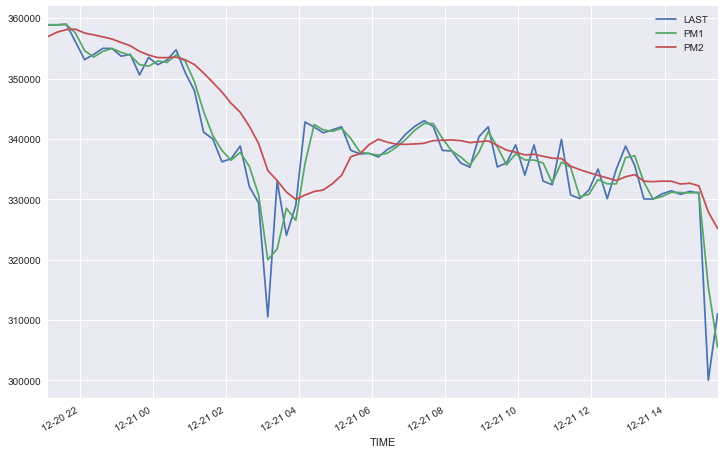

In [353]:
Bitso.plot(figsize=(12,8))

In [354]:
Bitso['Posicion'] = np.where(Bitso['PM1'] > Bitso['PM2'], 1, -1)

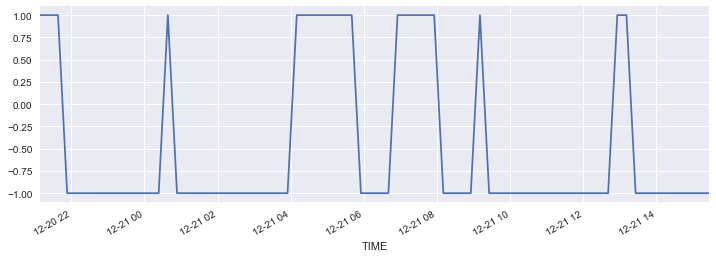

In [355]:
Bitso['Posicion'].plot(figsize=(12,4));

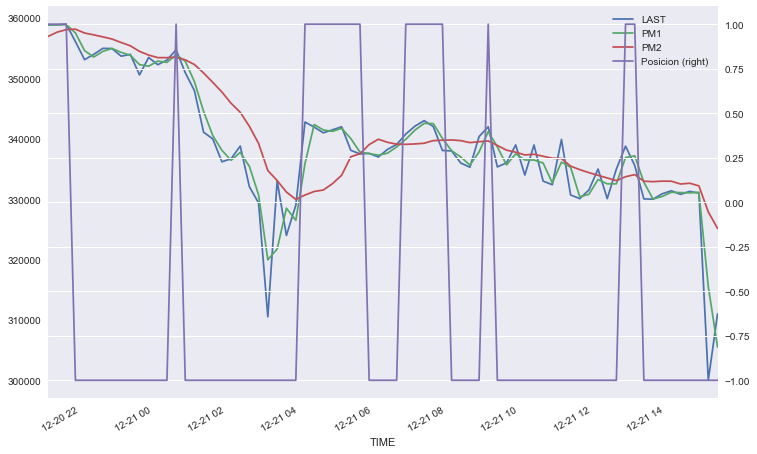

In [356]:
Bitso.plot(figsize=(12,8), secondary_y = 'Posicion')

In [357]:
Bitso['Retornos'] = np.log(Bitso['LAST']/Bitso['LAST'].shift(1))

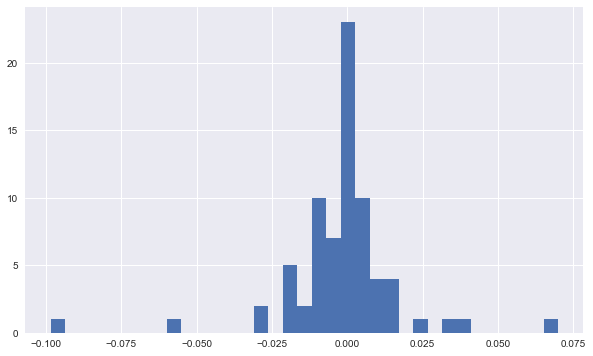

In [358]:
Bitso['Retornos'].hist(bins=35, figsize=(10,6));

In [359]:
Bitso.head()

,LAST,PM1,PM2,Posicion,Retornos
TIME,,,,,
2017-12-20 21:08:01,358893.58,358886.755,356967.458889,1,NaN
2017-12-20 21:23:02,358894.97,358894.275,357678.011111,1,0.000004
2017-12-20 21:38:04,359000.00,358947.485,358095.482222,1,0.000293
2017-12-20 21:53:05,356114.11,357557.055,358177.057778,-1,-0.008071
2017-12-20 22:08:07,353120.19,354617.150,357537.011111,-1,-0.008443


In [360]:
Bitso.dropna(inplace = True)

In [361]:
Bitso['Estrategia'] = Bitso['Retornos']* Bitso['Posicion'].shift(1)

In [362]:
Bitso.head()

,LAST,PM1,PM2,Posicion,Retornos,Estrategia
TIME,,,,,,
2017-12-20 21:23:02,358894.97,358894.275,357678.011111,1,0.000004,NaN
2017-12-20 21:38:04,359000.00,358947.485,358095.482222,1,0.000293,0.000293
2017-12-20 21:53:05,356114.11,357557.055,358177.057778,-1,-0.008071,-0.008071
2017-12-20 22:08:07,353120.19,354617.150,357537.011111,-1,-0.008443,0.008443
2017-12-20 22:23:08,353997.00,353558.595,357231.122222,-1,0.002480,-0.002480


In [363]:
Bitso.dropna(inplace = True)

In [364]:
Bitso.head()

,LAST,PM1,PM2,Posicion,Retornos,Estrategia
TIME,,,,,,
2017-12-20 21:38:04,359000.00,358947.485,358095.482222,1,0.000293,0.000293
2017-12-20 21:53:05,356114.11,357557.055,358177.057778,-1,-0.008071,-0.008071
2017-12-20 22:08:07,353120.19,354617.150,357537.011111,-1,-0.008443,0.008443
2017-12-20 22:23:08,353997.00,353558.595,357231.122222,-1,0.002480,-0.002480
2017-12-20 22:38:09,355000.00,354498.500,356900.018889,-1,0.002829,-0.002829


In [365]:
Bitso['Retacum'] = Bitso['Retornos'].cumsum().apply(np.exp)
Bitso['Estracum'] = Bitso['Estrategia'].cumsum().apply(np.exp)

In [366]:
Bitso.tail()

,LAST,PM1,PM2,Posicion,Retornos,Estrategia,Retacum,Estracum
TIME,,,,,,,,
2017-12-21 14:26:15,330800.00,331098.500,332515.220000,-1,-0.001803,0.001803,0.921718,0.910151
2017-12-21 14:41:17,331300.00,331050.000,332649.412222,-1,0.001510,-0.001510,0.923111,0.908777
2017-12-21 14:56:25,331000.00,331150.000,332204.967778,-1,-0.000906,0.000906,0.922275,0.909601
2017-12-21 15:11:49,300000.00,315500.000,327893.968889,-1,-0.098336,0.098336,0.835899,1.003593
2017-12-21 15:27:00,310998.99,305499.495,325161.774444,-1,0.036007,-0.036007,0.866546,0.968099


([], <a list of 0 Text xticklabel objects>)

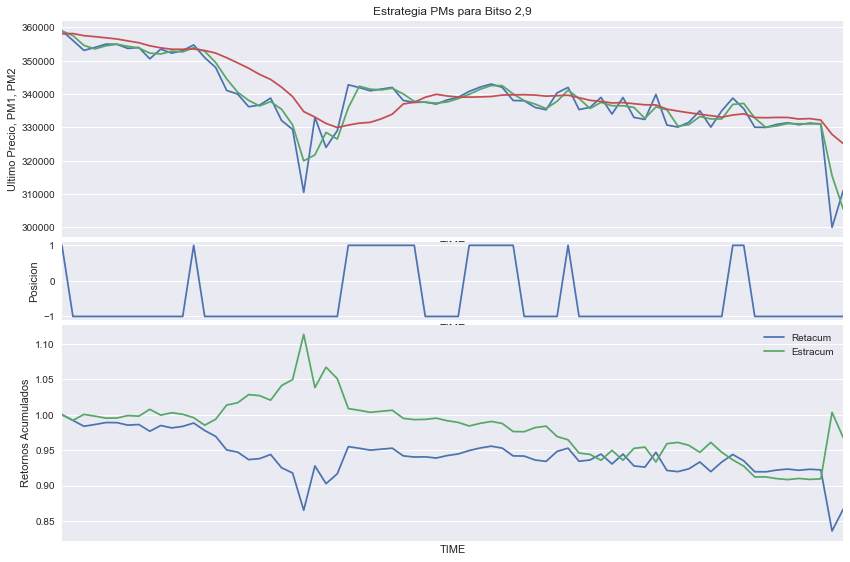

In [367]:
fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot2grid((25,1),(0,0),rowspan = 8, colspan = 1)
Bitso['LAST'].plot(title = ('Estrategia PMs para Bitso ' + str(pm1) + ',' + str(pm2)))
Bitso['PM1'].plot(ax=ax1)
Bitso['PM2'].plot(ax=ax1)

ax1.set_ylabel('Ultimo Precio, PM1, PM2')
plt.xticks([],[])

ax2 = plt.subplot2grid((25,1),(8,0), rowspan = 3, colspan = 1)
Bitso['Posicion'].plot(ylim=[-1.1,1.1])
ax2.set_ylabel('Posicion')
plt.xticks([],[])

ax3=plt.subplot2grid((25,1),(11,0),rowspan = 8, colspan = 1)
Bitso[['Retacum', 'Estracum']].plot(ax = ax3)
ax3.set_ylabel('Retornos Acumulados')
plt.xticks([],[])